In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import fitsio
from healpy.newvisufunc import projview
from astropy.table import Table
import os
import sys

In [4]:
# parameters
maps_dir = '/scratch/aew492/quasars/maps'
NSIDE = 64

### stars map

In [5]:
map_stars = np.load(os.path.join(maps_dir, f'map_stars_NSIDE{NSIDE}.npy'))

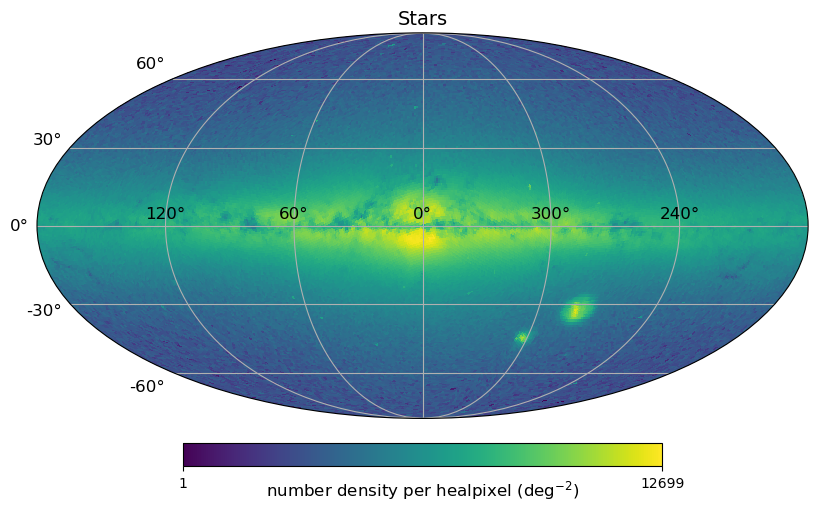

In [7]:
projview(map_stars, title='Stars', projection_type='mollweide',
            unit=r"number density per healpixel (deg$^{-2}$)",
         coord=['C','G'],  # transform from equatorial to galactic coords
         norm='log',   # log scale
         graticule=True, graticule_labels=True)

### dust

In [6]:
map_dust = np.load(os.path.join(maps_dir, f'map_dust_NSIDE{NSIDE}.npy'))

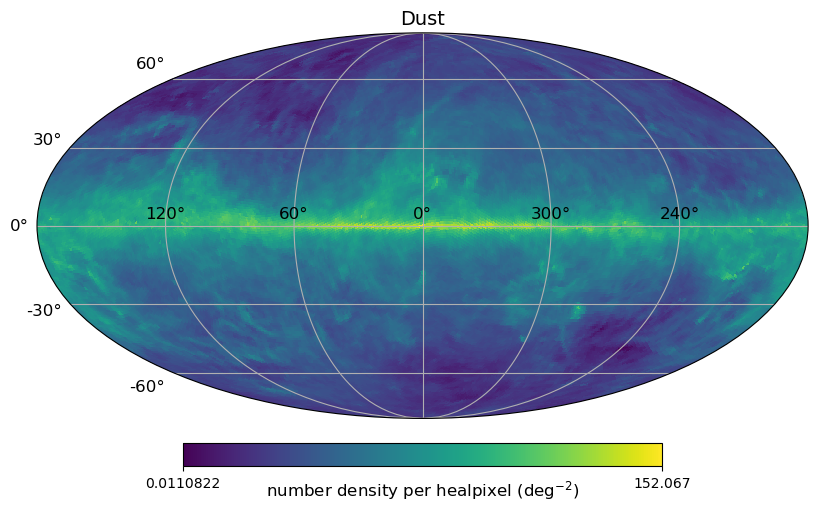

In [7]:
projview(map_dust, title='Dust', projection_type='mollweide',
            unit=r"number density per healpixel (deg$^{-2}$)",
         coord=['C','G'],
         norm='log',
         graticule=True, graticule_labels=True)

### m10

In [8]:
map_m10 = np.load(os.path.join(maps_dir, f'map_m10_NSIDE{NSIDE}.npy'))

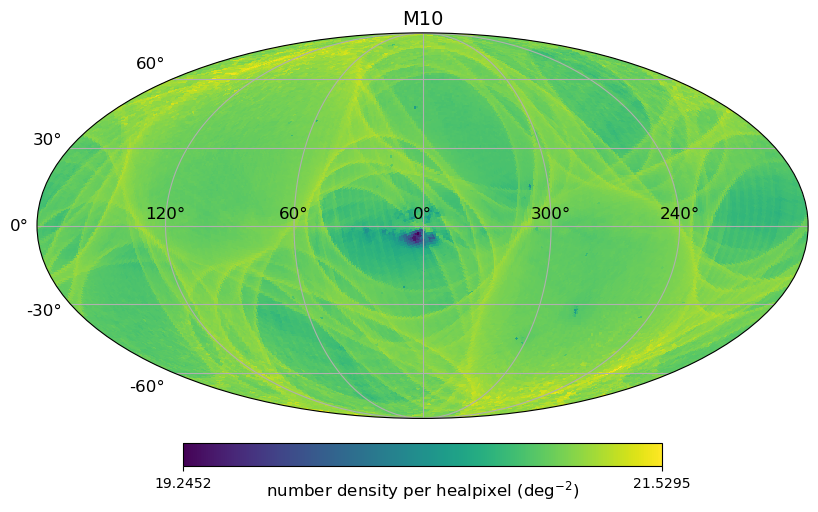

In [9]:
projview(map_m10, title='M10', projection_type='mollweide',
            unit=r"number density per healpixel (deg$^{-2}$)",
         coord=['C','G'],
         norm=None,
         graticule=True, graticule_labels=True)

### MCs

In [10]:
map_mcs = np.load(os.path.join(maps_dir, f'map_mcs_NSIDE{NSIDE}.npy'))

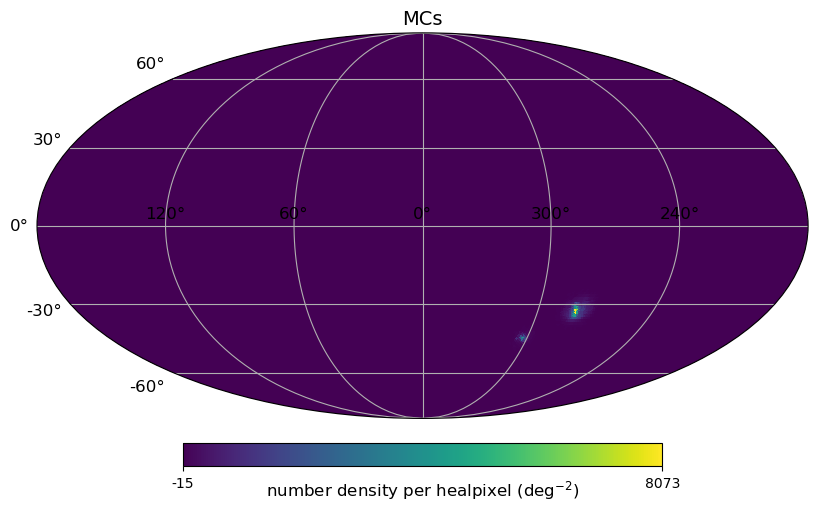

In [11]:
projview(map_mcs, title='MCs', projection_type='mollweide',
            unit=r"number density per healpixel (deg$^{-2}$)",
         coord=['C','G'],
         norm=None,
         graticule=True, graticule_labels=True)

#### check output selection function!

In [45]:
sf_fn = os.path.join(maps_dir, 'selection_function_NSIDE64_G20.5_abby.fits')

In [46]:
# via fitsio -> np array
sf_fits = fitsio.read(sf_fn)

In [47]:
# very strange shape...
sf_fits.shape, sf_fits[0].shape, sf_fits[0][0].shape

((48,), (), (1024,))

In [48]:
48*1024

49152

In [49]:
# check that this is the correct NPIX
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
NPIX

49152

In [50]:
# reshape
newarr = np.array([row[0] for row in sf_fits])
print(newarr.shape)
sf_map = np.reshape(newarr, (NPIX,))
print(sf_map.shape)

(48, 1024)
(49152,)


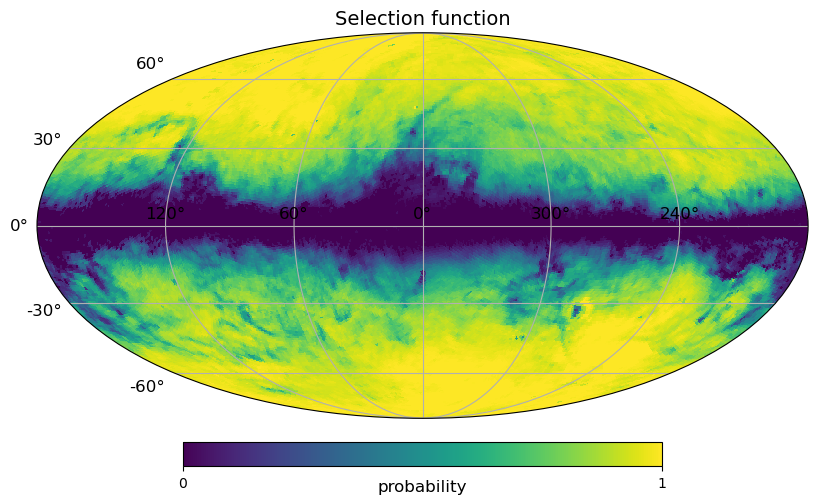

In [51]:
projview(sf_map, title='Selection function', projection_type='mollweide',
            unit=r"probability",
         coord=['C','G'],
         norm=None,
         graticule=True, graticule_labels=True)